# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

## Prepare the data

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [34]:
# WARMUP Model
model15 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model15.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)             

## Train the model

In [35]:
# TRAINING THE WARMUP MODEL
batch_size = 128
epochs = 15

model15.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model15.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 31s 72ms/step - loss: 0.3604 - accuracy: 0.8905 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 30s 72ms/step - loss: 0.1091 - accuracy: 0.9669 - val_loss: 0.0572 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.0484 - val_accuracy: 0.9862
Epoch 5/15
422/422 [==============================] - 33s 79ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0402 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 33s 77ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0361 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


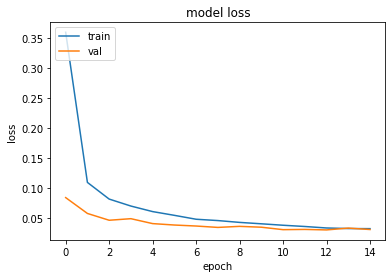

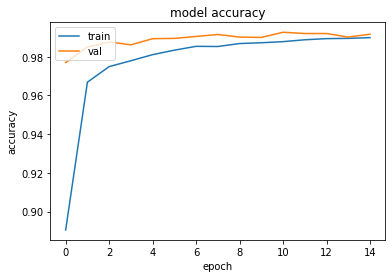

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# loss plots
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# accuracy plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026356829330325127
Test accuracy: 0.991100013256073


In [46]:
# TECHNICAL ANALYSIS - Question 2
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),               
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model6.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                

In [47]:
batch_size = 128
epochs = 15

model6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history6 = model6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 206s 487ms/step - loss: 0.4590 - accuracy: 0.8519 - val_loss: 0.0588 - val_accuracy: 0.9822
Epoch 2/15
350/422 [=======================>......] - ETA: 33s - loss: 0.1489 - accuracy: 0.9573

KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


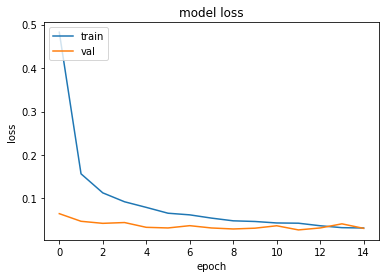

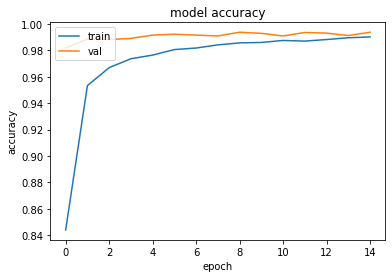

In [22]:
# list all data in history
print(history6.history.keys())
# summarize history for accuracy
# loss plots
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# accuracy plots
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1352)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1352)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
__________________________________________________

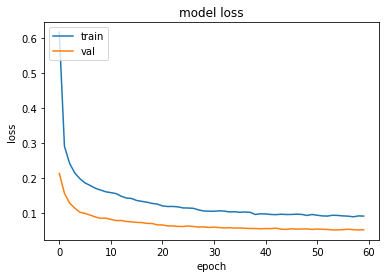

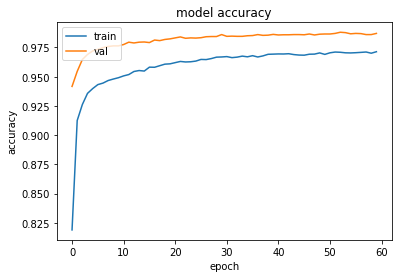

In [14]:
# TECHNICAL ANALYSIS - Question 3

model13 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model13.summary()

batch_size = 128
epochs = 60

model13.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = model13.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
# loss plots
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# accuracy plots
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# BONUS
#Iterate thru all the layers of the model
for layer in model15.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

conv2d_10 (3, 3, 1, 32)
conv2d_11 (3, 3, 32, 64)


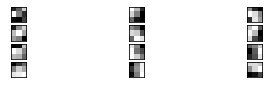

In [39]:
# The code below is for any channel input images (such as 1 channel or 3 channels)
# If there are 3 channels just change ix = 3
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model15.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 12, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()